<a href="https://colab.research.google.com/github/GerardoMunoz/embedded/blob/main/PIO_RP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

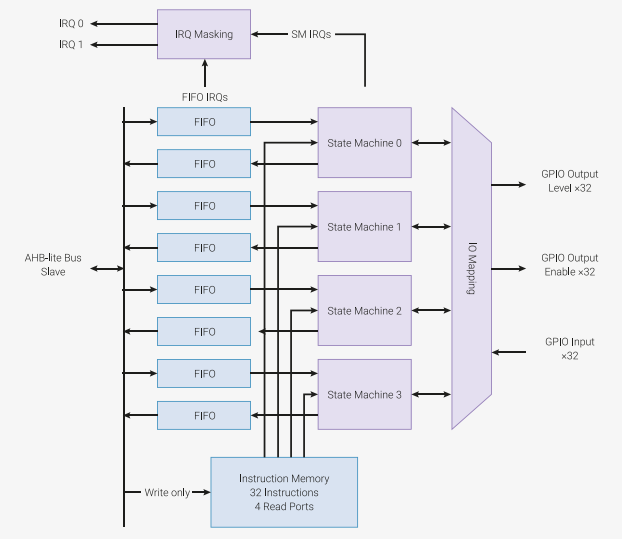

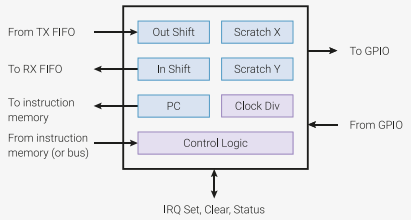


* https://docs.micropython.org/en/latest/rp2/quickref.html#programmable-io-pio

* https://docs.micropython.org/en/latest/library/rp2.html#pio-assembly-language-instructions

*  https://docs.micropython.org/en/latest/rp2/quickref.html#programmable-io-pio

* https://docs.micropython.org/en/latest/rp2/quickref.html#programmable-io-pio

```python
from machine import Pin
import rp2

@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink_1hz():
    # Cycles: 1 + 7 + 32 * (30 + 1) = 1000
    set(pins, 1)
    set(x, 31)                  [6]
    label("delay_high")
    nop()                       [29]
    jmp(x_dec, "delay_high")

    # Cycles: 1 + 7 + 32 * (30 + 1) = 1000
    set(pins, 0)
    set(x, 31)                  [6]
    label("delay_low")
    nop()                       [29]
    jmp(x_dec, "delay_low")

# Create and start a StateMachine with blink_1hz, outputting
sm = rp2.StateMachine(0, blink_1hz, freq=2000, set_base=Pin(25))
sm.active(1)
```


* https://docs.micropython.org/en/v1.17/library/rp2.StateMachine.html

* https://docs.micropython.org/en/latest/rp2/tutorial/pio.html#an-example


In [ ]:
# Example using PIO to blink an LED and raise an IRQ at 1Hz.

import time
from machine import Pin
import rp2


@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink_1hz():
    # Cycles: 1 + 1 + 6 + 32 * (30 + 1) = 1000
    irq(rel(0))
    set(pins, 1)
    set(x, 31)                  [5]
    label("delay_high")
    nop()                       [29]
    jmp(x_dec, "delay_high")

    # Cycles: 1 + 7 + 32 * (30 + 1) = 1000
    set(pins, 0)
    set(x, 31)                  [6]
    label("delay_low")
    nop()                       [29]
    jmp(x_dec, "delay_low")


# Create the StateMachine with the blink_1hz program, outputting on Pin(25).
sm = rp2.StateMachine(0, blink_1hz, freq=2000, set_base=Pin(25))

# Set the IRQ handler to print the millisecond timestamp.
sm.irq(lambda p: print(time.ticks_ms()))

# Start the StateMachine.
sm.active(1)

https://docs.google.com/presentation/d/1wfCDFDfuMo_E2R9JJJNQ7__g7QDjWI_60rEUL7MjgLk/edit?usp=sharing